JORGE ADRIÁN CARO CASTILLO A01570425

Final Project "Madden Ratings" Offense/Defense

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import numpy as np
#from sklearn import linear_model

In [91]:
df = pd.read_csv('madden21_off_def_ratings2.csv')
df.head()

,Team,Full Name,Overall Rating,Off_Def,Position,Age,Speed,Acceleration,Awareness,Agility,...,Jersey Number,Total Salary,Signing Bonus,Archetype,Running Style,Years Pro,Height,Weight,Birthdate,College
0,Rams,Aaron Donald,99,Defense,RE,29,82,90,99,86,...,99,"$101,892,000.00","$40,000,000.00",DE_PowerRusher,Default Stride Loose,6,73,280,5/23/1991,Pittsburgh
1,Patriots,Stephon Gilmore,99,Defense,CB,29,92,94,99,94,...,24,"$33,550,000.00","$31,450,000.00",CB_MantoMan,Default,8,73,202,9/19/1990,South Carolina
2,Panthers,Christian McCaffrey,99,Offense,HB,24,92,93,97,97,...,22,"$45,840,000.00","$32,190,000.00",HB_ReceivingBack,Short Stride Default,3,71,205,06/07/96,Stanford
3,Chiefs,Patrick Mahomes,99,Offense,QB,24,81,87,97,88,...,15,"$6,840,000.00","$34,420,000.00",QB_Improviser,Default,3,75,230,9/17/1995,Texas Tech
4,Saints,Michael Thomas,99,Offense,WR,27,89,92,99,92,...,13,"$62,750,000.00","$35,130,000.00",WR_RouteRunner,Default,4,75,212,03/03/93,Ohio State


In [92]:
df.shape

(2293, 70)

In [93]:
df.columns

Index(['Team', 'Full Name', 'Overall Rating', 'Off_Def', 'Position', 'Age',
       'Speed', 'Acceleration', 'Awareness', 'Agility', 'Strength',
       'Throw Power', 'Throw On The Run', 'Throw Under Pressure',
       'Throw Accuracy Short', 'Throw Accuracy Mid', 'Throw Accuracy Deep',
       'Release', 'Ball Carrier Vision', 'Stamina', 'Carrying', 'Play Action',
       'Pursuit', 'Play Recognition', 'Short Route Running',
       'Medium Route Running', 'Deep Route Running', 'Catch In Traffic',
       'Catching', 'Spin Move', 'Finesse Moves', 'Spectacular Catch',
       'Jumping', 'Tackle', 'Zone Coverage', 'Man Coverage', 'Trucking',
       'Juke Move', 'Break Sack', 'Toughness', 'Stiff Arm', 'Power Moves',
       'Lead Blocking', 'Run Block Power', 'Run Blocking', 'Hit Power',
       'Pass Block Finesse', 'Pass Block Power', 'Pass Blocking',
       'Impact Blocking', 'Kick Return', 'Kick Accuracy', 'Break Tackle',
       'Kick Power', 'Change Of Direction', 'Press', 'Block Shedding',


## Correlación (variables numéricas)

In [99]:
vars = ['Overall Rating','Carrying','Catching','Juke Move','Throw Power','Short Route Running','Spin Move','Break Tackle']

df = df[vars].dropna()

df[vars].corr()

,Overall Rating,Carrying,Catching,Juke Move,Throw Power,Short Route Running,Spin Move,Break Tackle
Overall Rating,1.000000,0.163355,0.208120,0.188078,-0.011331,0.123560,0.192364,0.188769
Carrying,0.163355,1.000000,0.823814,0.848533,0.290396,0.750881,0.853072,0.847908
Catching,0.208120,0.823814,1.000000,0.834688,0.065872,0.790068,0.836059,0.797472
Juke Move,0.188078,0.848533,0.834688,1.000000,0.290576,0.716687,0.978214,0.932004
Throw Power,-0.011331,0.290396,0.065872,0.290576,1.000000,0.150173,0.273094,0.328390
Short Route Running,0.123560,0.750881,0.790068,0.716687,0.150173,1.000000,0.731770,0.803790
Spin Move,0.192364,0.853072,0.836059,0.978214,0.273094,0.731770,1.000000,0.930503
Break Tackle,0.188769,0.847908,0.797472,0.932004,0.328390,0.803790,0.930503,1.000000


## Entrenamiento y prueba

In [136]:
X = pd.DataFrame(df[['Carrying','Catching','Juke Move','Throw Power','Short Route Running','Spin Move','Break Tackle','Off_Def']]) #independiente
X = sm.add_constant(X)
Y = pd.DataFrame(df['Overall Rating']) #dependiente

KeyError: "['Off_Def'] not in index"

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [138]:
X

,const,Carrying,Catching,Juke Move,Throw Power,Short Route Running,Spin Move,Break Tackle
0,1.0,48,42,28,20,16,25,17
1,1.0,62,76,80,43,15,53,67
2,1.0,98,82,96,44,83,92,83
3,1.0,63,37,72,97,27,69,76
4,1.0,77,99,89,24,99,79,82
...,...,...,...,...,...,...,...,...
2288,1.0,60,55,42,11,40,40,17
2289,1.0,64,56,37,26,35,25,15
2290,1.0,47,53,55,29,22,42,25
2291,1.0,58,47,54,29,22,42,25


In [139]:
print(X_train.head())
print(X_train.shape)

      const  Carrying  Catching  Juke Move  Throw Power  Short Route Running  \
1472    1.0        78        79         74           29                   67   
261     1.0        78        95         65           26                   71   
952     1.0        39        35         10           11                   15   
2138    1.0        30        30         10            9                   10   
700     1.0        37        31         32           22                   10   

      Spin Move  Break Tackle  
1472         73            61  
261          58            63  
952          10             5  
2138         10            10  
700          26            33  
(1605, 8)


In [140]:
print(X_test.head())
print(X_test.shape)

      const  Carrying  Catching  Juke Move  Throw Power  Short Route Running  \
1875    1.0        56        62         38           25                   15   
2066    1.0        57        60         63           25                   29   
1314    1.0        57        52         48           36                   21   
1979    1.0        61        68         67           26                   22   
1429    1.0        81        72         78           27                   71   

      Spin Move  Break Tackle  
1875         29            26  
2066         60            41  
1314         40            27  
1979         60            43  
1429         75            73  
(688, 8)


In [141]:
print(y_test.head())
print(y_test.shape)

      Overall Rating
1875              61
2066              59
1314              67
1979              60
1429              66
(688, 1)


## MODELO DE REGRESIÓN

### ESCENARIO 1

In [142]:
model = sm.OLS(y_train, X_train)
model = model.fit()

In [143]:
model

In [144]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.55
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.56e-22
Time:                        22:57:41   Log-Likelihood:                -5967.2
No. Observations:                1605   AIC:                         1.195e+04
Df Residuals:                    1597   BIC:                         1.199e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  64.9041    

In [145]:
residual_values = model.resid #valores residuales
residual_values 

1472    -6.054035
261      8.030750
952      3.887985
2138   -11.965524
700      4.890001
          ...    
1638    -9.649508
1095    -0.838860
1130    -2.759502
1294    -1.201342
860      5.742595
Length: 1605, dtype: float64

In [146]:
m1_pred = model.fittedvalues
m1_pred

1472    71.054035
261     73.969250
952     67.112015
2138    67.965524
700     69.109999
          ...    
1638    73.649508
1095    69.838860
1130    71.759502
1294    68.201342
860     66.257405
Length: 1605, dtype: float64

In [147]:
y_train.head(2)

,Overall Rating
1472,65
261,82


### Normalidad

<AxesSubplot:ylabel='Count'>

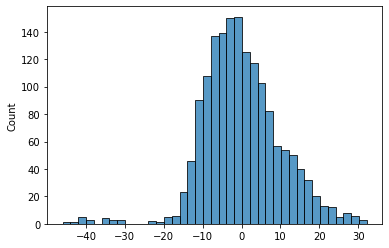

In [148]:
sns.histplot(model.resid)

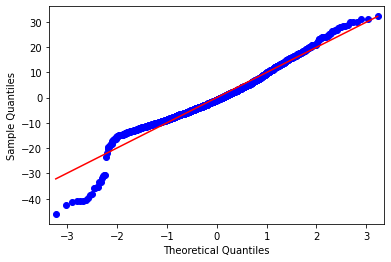

In [149]:
sm.qqplot(model.resid, line='s');

In [150]:
from scipy.stats import shapiro
shapiro(model.resid)
#no cumple con el requisito de normalidad

ShapiroResult(statistic=0.9648491144180298, pvalue=2.6466625975611527e-19)

## Homogeneidad de varianza (valores ajustados vs. residuales)

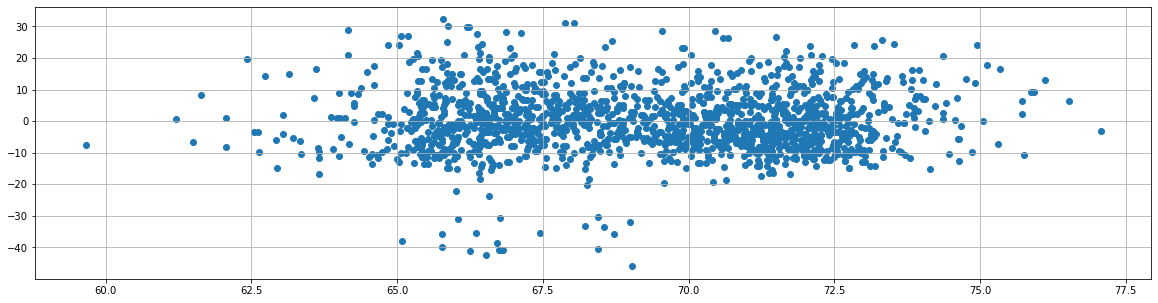

In [151]:
plt.figure(figsize=(20,5))
plt.scatter(x = model.fittedvalues, y = model.resid)
plt.grid(True)

### Independencia

In [152]:
model.resid

1472    -6.054035
261      8.030750
952      3.887985
2138   -11.965524
700      4.890001
          ...    
1638    -9.649508
1095    -0.838860
1130    -2.759502
1294    -1.201342
860      5.742595
Length: 1605, dtype: float64

In [153]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res.head()

,0
0,-6.054035
1,8.030750
2,3.887985
3,-11.965524
4,4.890001


In [154]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res = res.rename(columns={0: 'residuales'})
res.head()

,residuales
0,-6.054035
1,8.030750
2,3.887985
3,-11.965524
4,4.890001


In [155]:
orden = pd.DataFrame(pd.Series(range(1,12622)))
orden = orden.rename(columns={0: 'orden'})
orden.head()

,orden
0,1
1,2
2,3
3,4
4,5


In [156]:
indep = pd.concat([orden, res], axis = 1)
indep.head()

,orden,residuales
0,1,-6.054035
1,2,8.030750
2,3,3.887985
3,4,-11.965524
4,5,4.890001


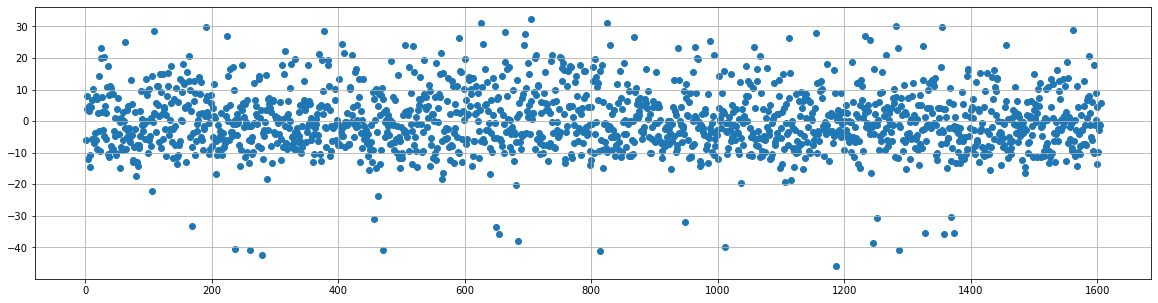

In [157]:
plt.figure(figsize=(20,5))
plt.scatter(x=indep['orden'], y=indep['residuales'])
plt.grid(True)

## Predicción

In [158]:
model.predict(X_test)

1875    71.013026
2066    70.181870
1314    67.910847
1979    71.767223
1429    71.117437
          ...    
352     72.606887
91      75.069871
998     66.274827
1824    68.481248
2031    69.659935
Length: 688, dtype: float64

In [159]:
pred1 = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)
pred1 = pred1.rename(columns={0: 'pred1'})
pred1.head()

,pred1
0,71.013026
1,70.181870
2,67.910847
3,71.767223
4,71.117437


In [160]:
pred1.shape

(688, 1)

In [161]:
y_test = y_test.reset_index(drop=True)
m1_resultados = pd.concat([y_test, pred1], axis = 1)
m1_resultados.head()

,Overall Rating,pred1
0,61,71.013026
1,59,70.181870
2,67,67.910847
3,60,71.767223
4,66,71.117437


In [162]:
y_test.head()

,Overall Rating
0,61
1,59
2,67
3,60
4,66


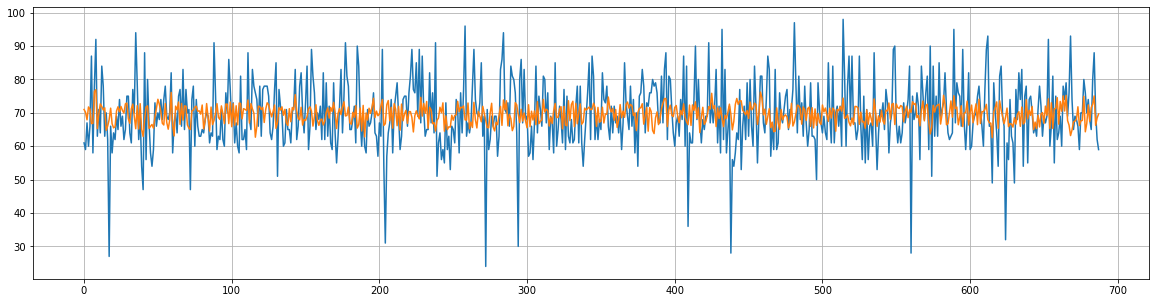

In [163]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Overall Rating']) #color azul
plt.plot(m1_resultados['pred1']) #color naranja
plt.grid(True)

In [164]:
m1_resultados = m1_resultados.head(20)

In [165]:
offense_df = df[df['Off_Def']==0]

KeyError: 'Off_Def'